In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки визуализации
plt.style.use('ggplot')
%matplotlib inline

# 1.Загрузка данных
sales_df = pd.read_csv('sales_data.csv')

# 2. Первичный анализ данных
print("\nПервые 5 строк данных:")
print(sales_df.head())

print("\nОбщая информация о данных:")
print(sales_df.info())

print("\nСтатистика данных:")
print(sales_df.describe())

# 3. Подготовка данных
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['Price']
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month_name()
sales_df['DayOfWeek'] = sales_df['Date'].dt.day_name()

print("\nДатасет после преобразования:")
display(sales_df.head())


Первые 5 строк данных:
         Date     Category             Product  Quantity  Price  Region
0  2023-01-05  Smartphones  Samsung Galaxy S21         2  54990  Center
1  2023-01-05  Accessories         iPhone Case         5   1200   South
2  2023-01-06      Laptops         HP Pavilion         1  62500    West
3  2023-01-07        Audio     Sony Headphones         3   4990  Center
4  2023-01-08  Smartphones           iPhone 13         2  79990   North

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      128 non-null    object
 1   Category  128 non-null    object
 2   Product   128 non-null    object
 3   Quantity  128 non-null    int64 
 4   Price     128 non-null    int64 
 5   Region    128 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.1+ KB
None

Статистика данных:
         Quantity          Price


,Date,Category,Product,Quantity,Price,Region,Revenue,Month,DayOfWeek
0,2023-01-05,Smartphones,Samsung Galaxy S21,2,54990,Center,109980,January,Thursday
1,2023-01-05,Accessories,iPhone Case,5,1200,South,6000,January,Thursday
2,2023-01-06,Laptops,HP Pavilion,1,62500,West,62500,January,Friday
3,2023-01-07,Audio,Sony Headphones,3,4990,Center,14970,January,Saturday
4,2023-01-08,Smartphones,iPhone 13,2,79990,North,159980,January,Sunday


In [2]:
# 4. Анализ по категориям
category_revenue = sales_df.groupby('Category')['Revenue'].sum()
print("\nВыручка по категориям:")
print(category_revenue)

# 5. Анализ по месяцам
monthly_sales = sales_df.groupby('Month')['Revenue'].sum()
print("\nПродажи по месяцам:")
print(monthly_sales)

# 6. Топ продуктов
top_products = sales_df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nТоп-5 самых продаваемых товаров:")
print(top_products)


Выручка по категориям:
Category
Accessories     257700
Audio          1321970
Laptops        4275700
Smartphones    7240510
TV             4319160
Name: Revenue, dtype: int64

Продажи по месяцам:
Month
April        1018570
August       1793510
December     2509180
February      874190
January       762000
July         1304460
June         1522410
March         959840
May          1292090
November     1870870
October      2249450
September    1258470
Name: Revenue, dtype: int64

Топ-5 самых продаваемых товаров:
Product
USB-C Cable             78
Screen Protector        63
Xiaomi Redmi Note 10    51
Samsung Galaxy S21      40
iPhone 13               37
Name: Quantity, dtype: int64


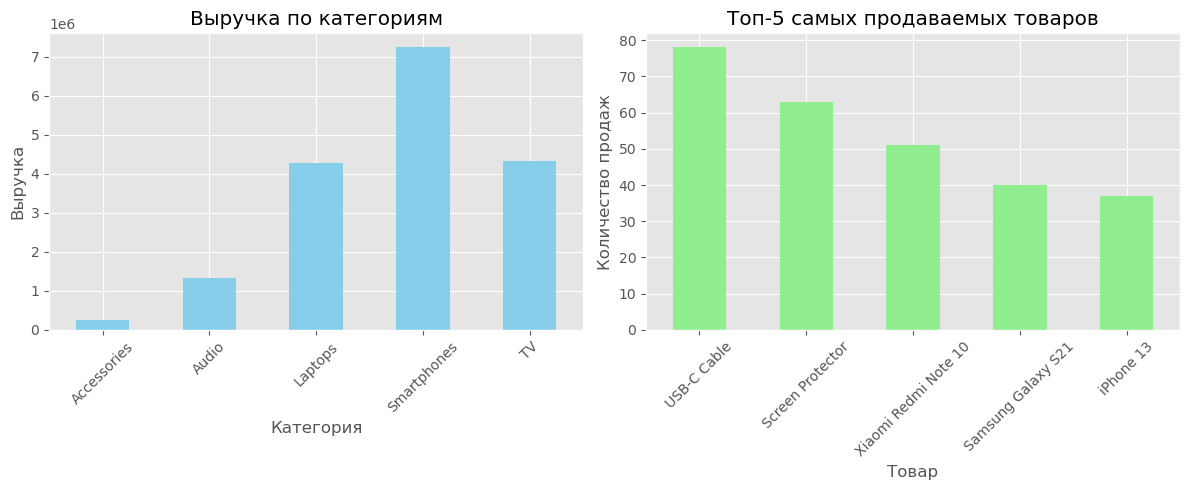

In [3]:
# 7. Визуализация
plt.figure(figsize=(12, 5))

# График 1: Выручка по категориям
plt.subplot(1, 2, 1)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Выручка по категориям')
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.xticks(rotation=45)

# График 2: Топ-5 товаров
plt.subplot(1, 2, 2)
top_products.plot(kind='bar', color='lightgreen')
plt.title('Топ-5 самых продаваемых товаров')
plt.xlabel('Товар')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()